In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium #Map chart
from folium.plugins import MarkerCluster #Map chart
import warnings #remove text above charts after running
warnings.filterwarnings("ignore", category=FutureWarning) #remove text above charts after running
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.model_selection import train_test_split #Linear Regression


In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
dataset=pd.read_excel('/content/Sample - Superstore (1).xls')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
dataset.info()

# Check for missing values
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Drop non-numeric columns and columns that are not relevant
numeric_data = dataset.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Postal Code', 'Ship Date']).select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Get summary statistics excluding specific columns
summary_statistics = dataset.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Postal Code', 'Ship Date']).describe()

# Display the summary statistics
print("\nSummary Statistics:")
print(summary_statistics)


Correlation Matrix:
             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000

Summary Statistics:
              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [ ]:
# Check for duplicates
duplicate_rows = dataset.duplicated()
# Verify no duplicates exist
dataset.duplicated().sum()

0

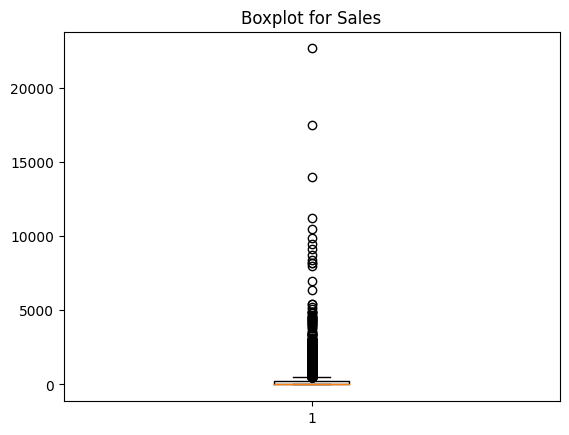

In [ ]:
# Descriptive statistics for 'Sales'
sales_stats = dataset['Sales'].describe()

# Boxplot for detecting outliers in 'Sales'
plt.boxplot(dataset['Sales'])
plt.title('Boxplot for Sales')
plt.show()

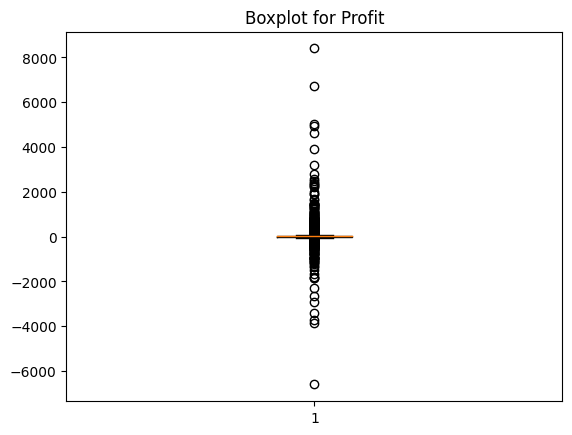

In [ ]:
# Descriptive statistics for 'Profit'
sales_stats = dataset['Profit'].describe()

# Boxplot for detecting outliers in 'Profit'
plt.boxplot(dataset['Profit'])
plt.title('Boxplot for Profit')
plt.show()

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = dataset['Sales'].quantile(0.25)
Q3 = dataset['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset_no_outliers = dataset[(dataset['Sales'] >= lower_bound) & (dataset['Sales'] <= upper_bound)]

# Verify by displaying the new data
dataset_no_outliers['Sales'].describe()

,Sales
count,8827.000000
mean,92.864853
std,114.045078
min,0.444000
25%,15.008000
50%,40.880000
75%,124.225000
max,498.260000


In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = dataset['Profit'].quantile(0.25)
Q3 = dataset['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset_no_outliers = dataset[(dataset['Profit'] >= lower_bound) & (dataset['Profit'] <= upper_bound)]

# Verify by displaying the new data
dataset_no_outliers['Profit'].describe()

,Profit
count,8113.000000
mean,11.604086
std,18.641425
min,-39.637000
25%,2.049200
50%,7.257600
75%,19.034400
max,70.722000


In [ ]:
# Save the cleaned dataset to a new CSV file
dataset.to_csv('/content/Drive/MyDrive/DEPI Final Project Material/Cleaned_Dataset.csv', index=False)

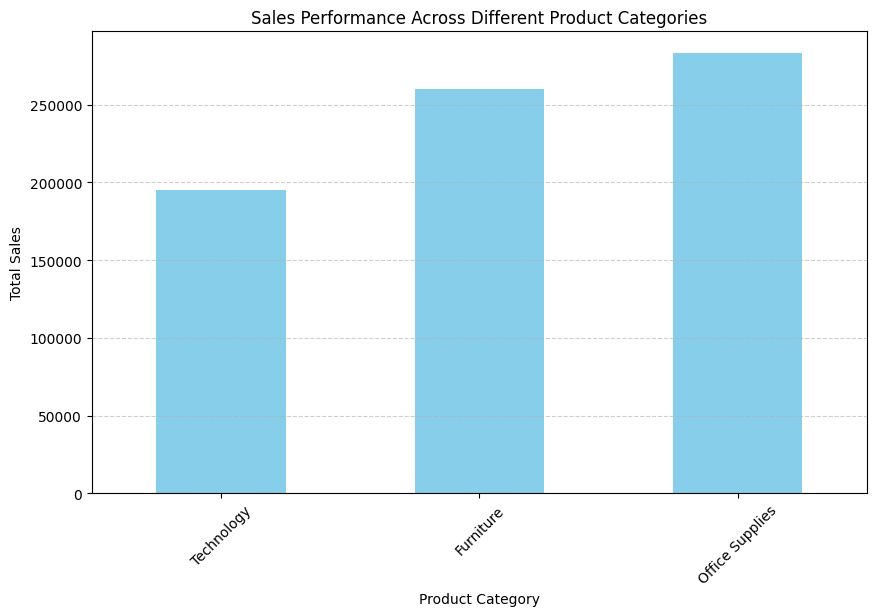

In [ ]:
#1-What is the sales performance across different product categories?
# Group the data by 'Category' and sum up the 'Sales'
category_sales = dataset_no_outliers.groupby('Category')['Sales'].sum().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Performance Across Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

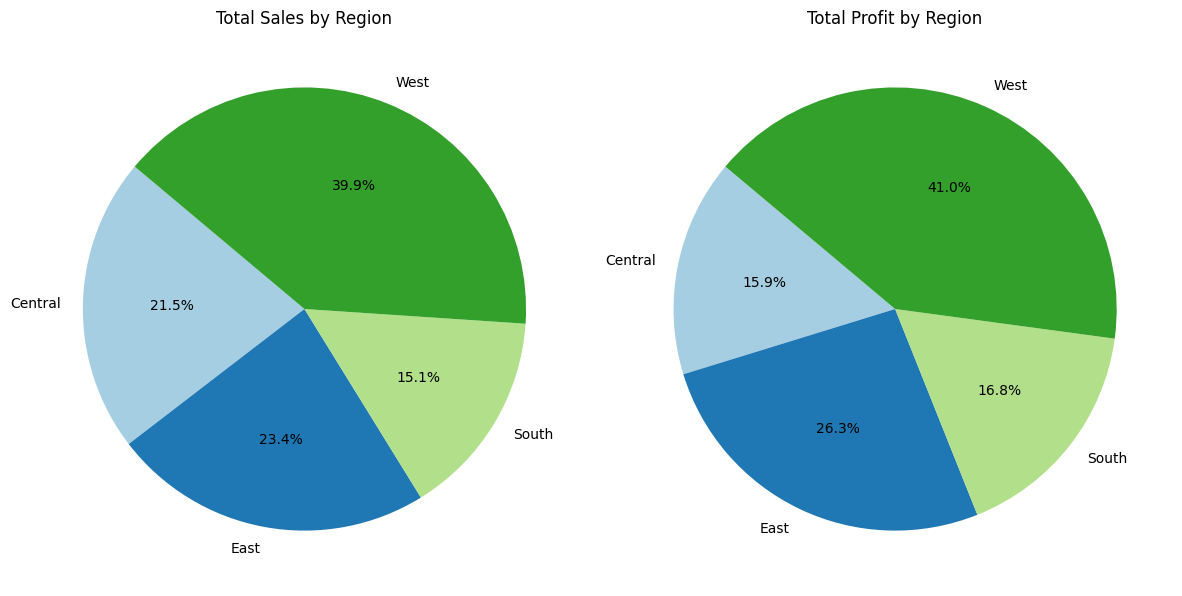

In [ ]:
#2-Which regions have the highest sales and profit performance? (Pie Chart)
# Group the data by 'Region' and sum up the 'Sales' and 'Profit'
region_sales = dataset_no_outliers.groupby('Region')['Sales'].sum()
region_profit = dataset_no_outliers.groupby('Region')['Profit'].sum()

# Create a pie chart for Sales
plt.figure(figsize=(12, 6))

# Plotting Sales pie chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Sales by Region')

# Plotting Profit pie chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Profit by Region')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
#3-Which regions have the highest sales and profit performance? (Map Chart)
# Grouping the data by region to calculate total sales and profit
region_sales_profit = dataset_no_outliers.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Define region coordinates (latitude and longitude)
region_coords = {
    'West': [37.7749, -122.4194],  # Example coordinates for regions
    'East': [40.7128, -74.0060],
    'South': [29.7604, -95.3698],
    'Central': [41.8781, -87.6298]
}

# Create a folium map centered on the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each region
marker_cluster = MarkerCluster().add_to(us_map)

for index, row in region_sales_profit.iterrows():
    region = row['Region']
    sales = row['Sales']
    profit = row['Profit']
    lat, lon = region_coords[region]

    # Create a popup with sales and profit information
    popup_text = f'Region: {region}<br>Sales: ${sales:,.2f}<br>Profit: ${profit:,.2f}'

    # Create the label text to display as a fixed label
    label_text = f'{region}: Sales ${sales:,.2f} | Profit ${profit:,.2f}'

    # Add a marker for the region
    folium.Marker(
        location=[lat, lon],
        popup=popup_text
    ).add_to(marker_cluster)

    # Add a fixed label next to the marker
    folium.map.Marker(
        [lat, lon],
        icon=folium.DivIcon(html=f"""
            <div style="font-size: 12px; color: black;">
                {label_text}
            </div>
        """)
    ).add_to(us_map)

# Save the map to an HTML file or display it
us_map.save("sales_profit_region_map.html")
us_map

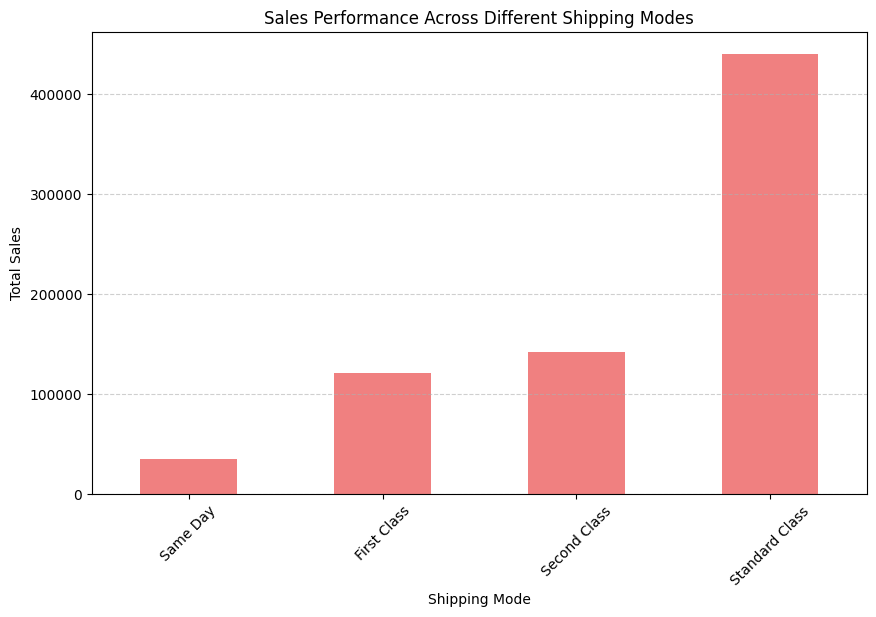

In [ ]:
#4-How does sales vary with shipping mode?
# Group the data by 'Ship Mode' and sum up the 'Sales'
shipping_mode_sales = dataset_no_outliers.groupby('Ship Mode')['Sales'].sum().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
shipping_mode_sales.plot(kind='bar', color='lightcoral')
plt.title('Sales Performance Across Different Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<ipython-input-16-51ec83dc7cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_outliers.loc['Order Date'] = pd.to_datetime(dataset_no_outliers['Order Date'], errors='coerce')
<ipython-input-16-51ec83dc7cf9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_outliers.loc[:, 'Month'] = dataset_no_outliers['Order Date'].dt.to_period('M')  # Monthly
<ipython-input-16-51ec83dc7cf9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

0   2017-11-08
2   2017-06-12
4   2016-10-11
5   2015-06-09
6   2015-06-09
Name: Order Date, dtype: datetime64[ns]


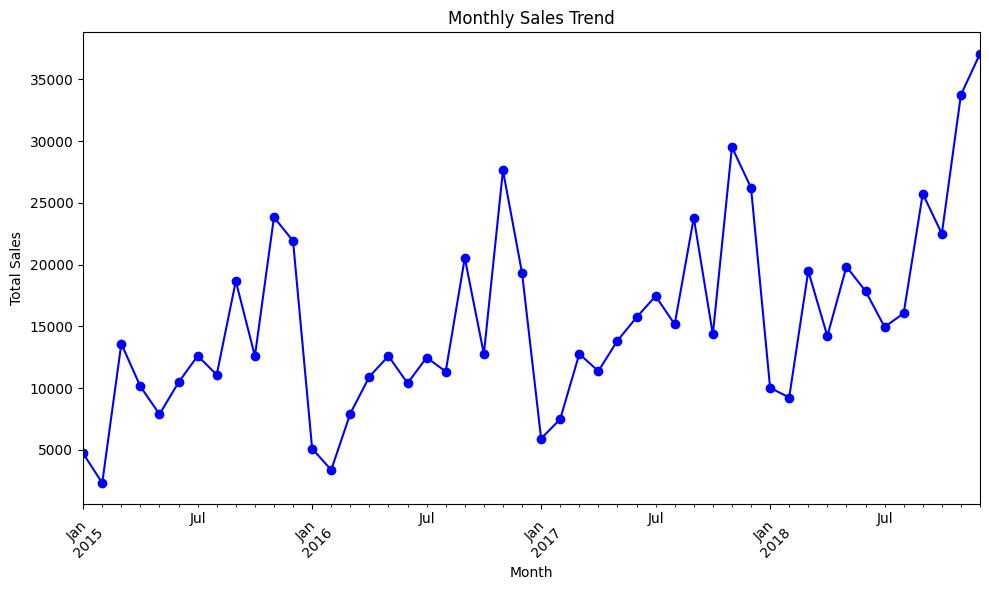

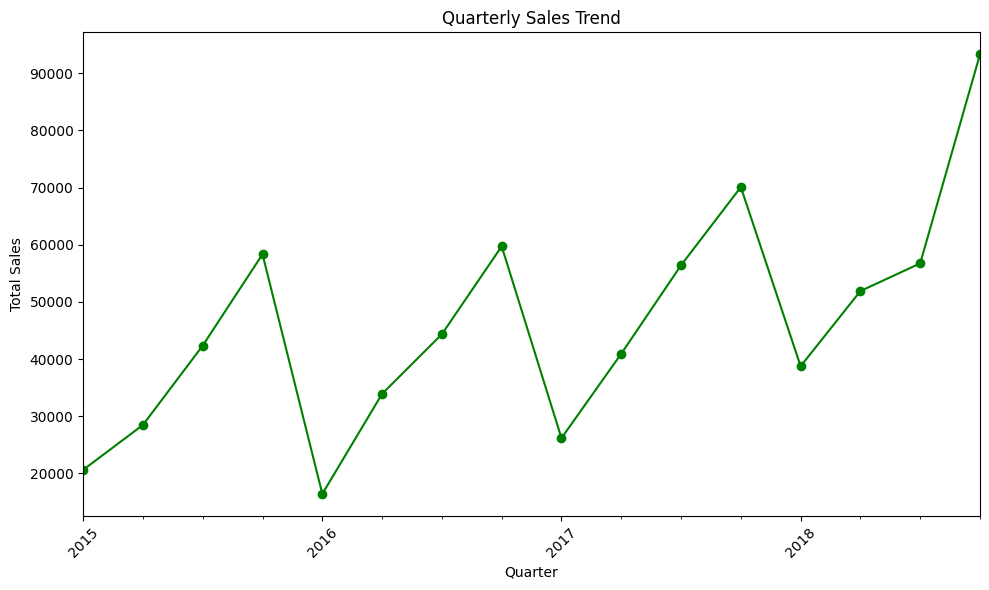

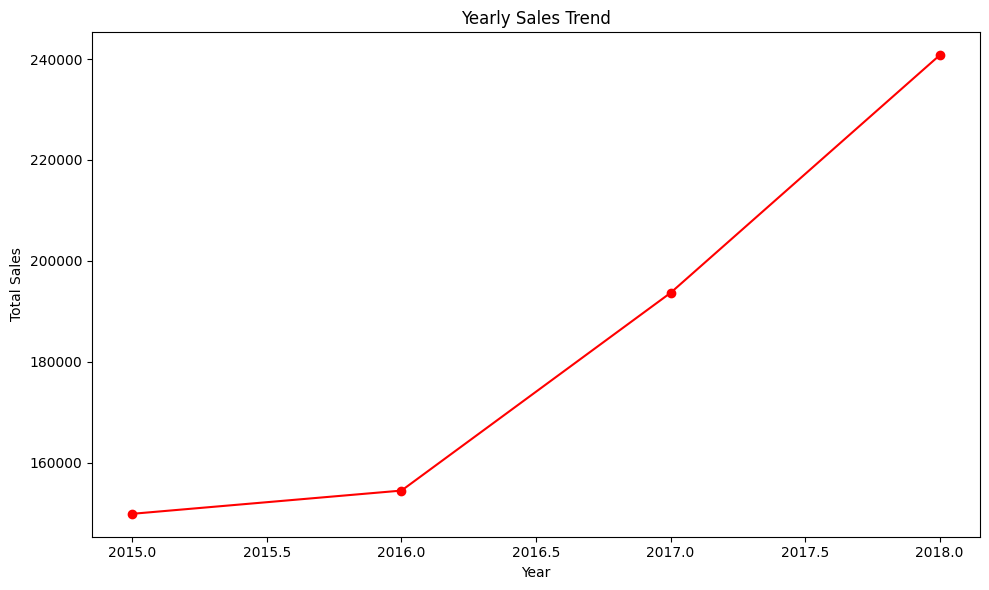

In [ ]:
#5- What is the sales performance over time (monthly/quarterly/yearly trends)?
# Ensure that 'Order Date' is converted to datetime format and check its dtype
dataset_no_outliers.loc['Order Date'] = pd.to_datetime(dataset_no_outliers['Order Date'], errors='coerce')

# Check if the conversion was successful by printing the first few rows
print(dataset_no_outliers['Order Date'].head())

# Extracting month, quarter, and year from the 'Order Date' using .loc[]
dataset_no_outliers.loc[:, 'Month'] = dataset_no_outliers['Order Date'].dt.to_period('M')  # Monthly
dataset_no_outliers.loc[:, 'Quarter'] = dataset_no_outliers['Order Date'].dt.to_period('Q')  # Quarterly
dataset_no_outliers.loc[:, 'Year'] = dataset_no_outliers['Order Date'].dt.year  # Yearly

# Grouping sales by month, quarter, and year
monthly_sales = dataset_no_outliers.groupby('Month')['Sales'].sum()
quarterly_sales = dataset_no_outliers.groupby('Quarter')['Sales'].sum()
yearly_sales = dataset_no_outliers.groupby('Year')['Sales'].sum()

# Plotting sales performance over time

# Monthly Sales Trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b');  # Add semicolon to suppress output
plt.legend().set_visible(False)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quarterly Sales Trend
plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='line', marker='o', color='g');  # Add semicolon to suppress output
plt.legend().set_visible(False)
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly Sales Trend
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o', color='r');  # Add semicolon to suppress output
plt.legend().set_visible(False)
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

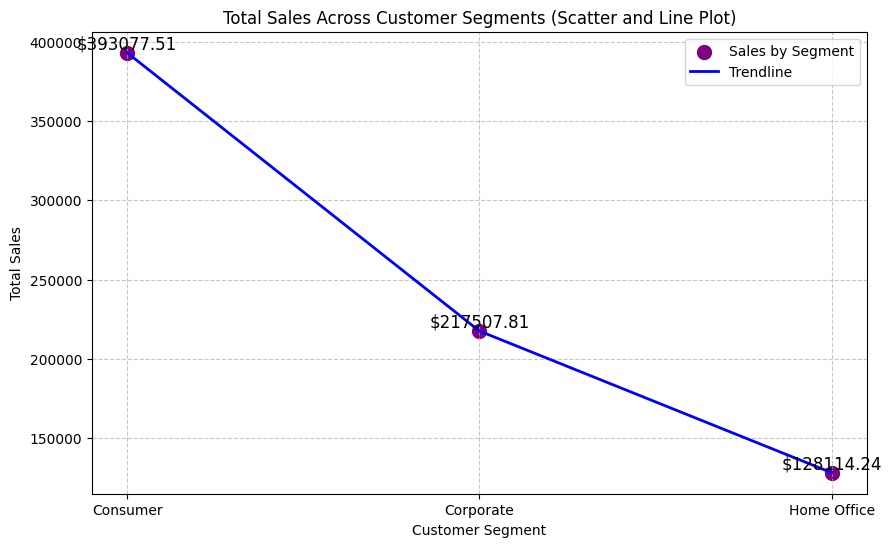

In [ ]:
#6- Which customer segments generate the highest sales? (Scatter Plot + Line Chart)

# Group the data by 'Segment' and calculate total sales
segment_sales = dataset_no_outliers.groupby('Segment')['Sales'].sum()

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the scatter plot
plt.scatter(segment_sales.index, segment_sales, color='purple', s=100, label='Sales by Segment')

# Plot the line connecting the points
plt.plot(segment_sales.index, segment_sales, color='blue', linestyle='-', linewidth=2, label='Trendline')

# Annotate each point with the sales value
for i, value in enumerate(segment_sales):
    plt.text(segment_sales.index[i], value, f'${value:.2f}', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Total Sales Across Customer Segments (Scatter and Line Plot)')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend to explain the plot elements
plt.legend()

# Display the plot
plt.show()

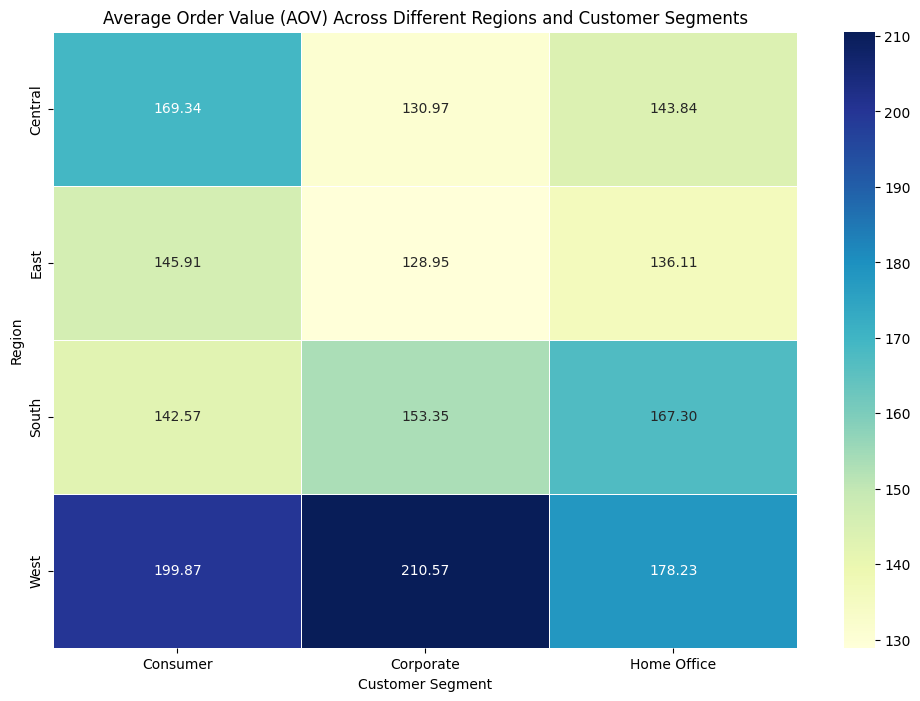

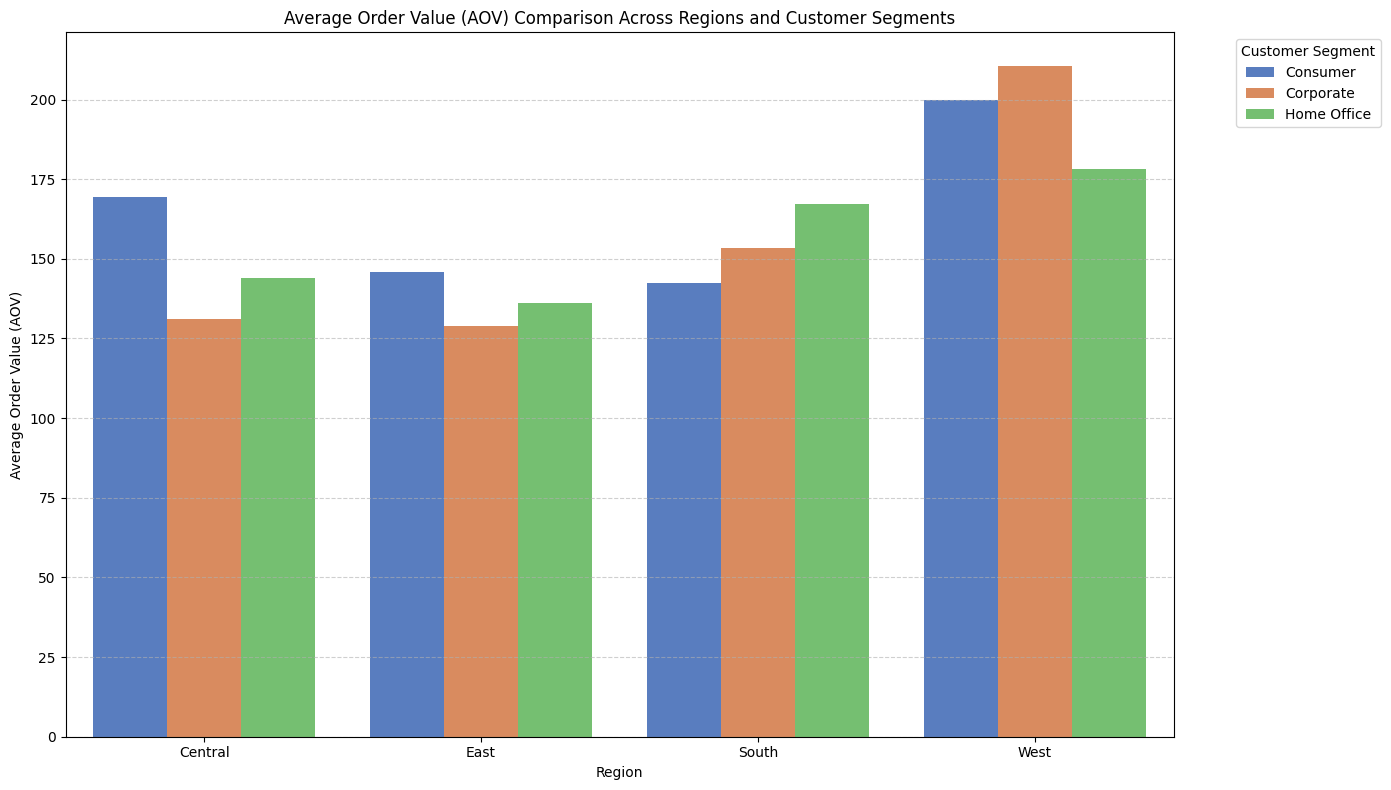

In [ ]:
#7-Which regions have the highest average order value (AOV) across different customer segments?
# Calculate the total sales and total number of orders for each region and customer segment
region_segment_sales = dataset_no_outliers.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()
region_segment_orders = dataset_no_outliers.groupby(['Region', 'Segment'])['Order ID'].nunique().reset_index()

# Merge the two dataframes to calculate the AOV
region_segment_data = pd.merge(region_segment_sales, region_segment_orders, on=['Region', 'Segment'])
region_segment_data.rename(columns={'Sales': 'Total Sales', 'Order ID': 'Total Orders'}, inplace=True)

# Calculate Average Order Value (AOV)
region_segment_data['AOV'] = region_segment_data['Total Sales'] / region_segment_data['Total Orders']

# Create a pivot table for visualization
pivot_aov = region_segment_data.pivot_table(index='Region', columns='Segment', values='AOV', fill_value=0)

# Create a heatmap to show the AOV across different regions and customer segments
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_aov, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Average Order Value (AOV) Across Different Regions and Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Region')
plt.show()

# Alternatively, create a bar chart for AOV comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='AOV', hue='Segment', data=region_segment_data, palette='muted')
plt.title('Average Order Value (AOV) Comparison Across Regions and Customer Segments')
plt.xlabel('Region')
plt.ylabel('Average Order Value (AOV)')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

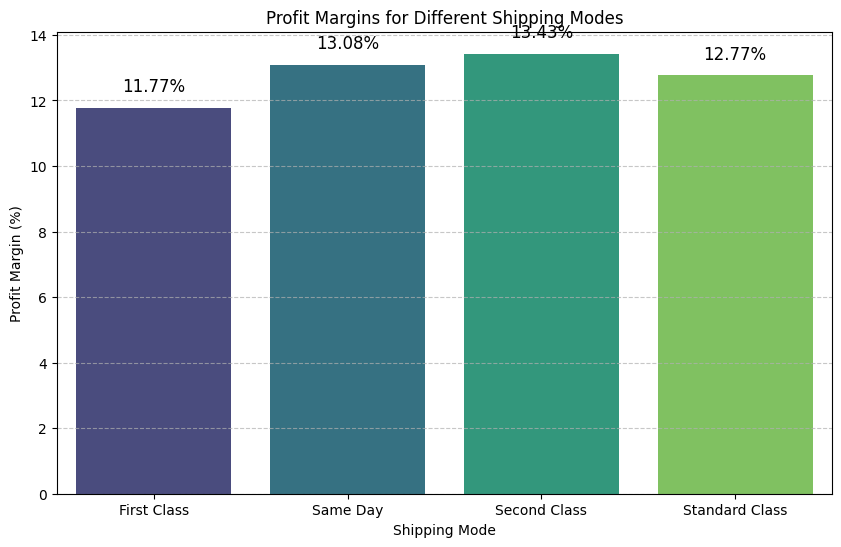

In [ ]:
#8-Which shipping mode yields the highest profit margins?
# Calculate total profit and sales for each shipping mode
shipping_mode_profit = dataset_no_outliers.groupby('Ship Mode')[['Profit', 'Sales']].sum().reset_index()

# Calculate profit margin for each shipping mode
shipping_mode_profit['Profit Margin (%)'] = (shipping_mode_profit['Profit'] / shipping_mode_profit['Sales']) * 100

# Visualization using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Profit Margin (%)', data=shipping_mode_profit, palette='viridis')
plt.title('Profit Margins for Different Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Profit Margin (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display profit margin values on top of each bar
for index, row in shipping_mode_profit.iterrows():
    plt.text(index, row['Profit Margin (%)'] + 0.5, f'{row["Profit Margin (%)"]:.2f}%', ha='center', fontsize=12)

plt.show()

<ipython-input-21-7c17ed4faacc>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_products['Product ID'], rotation=45, ha='right')


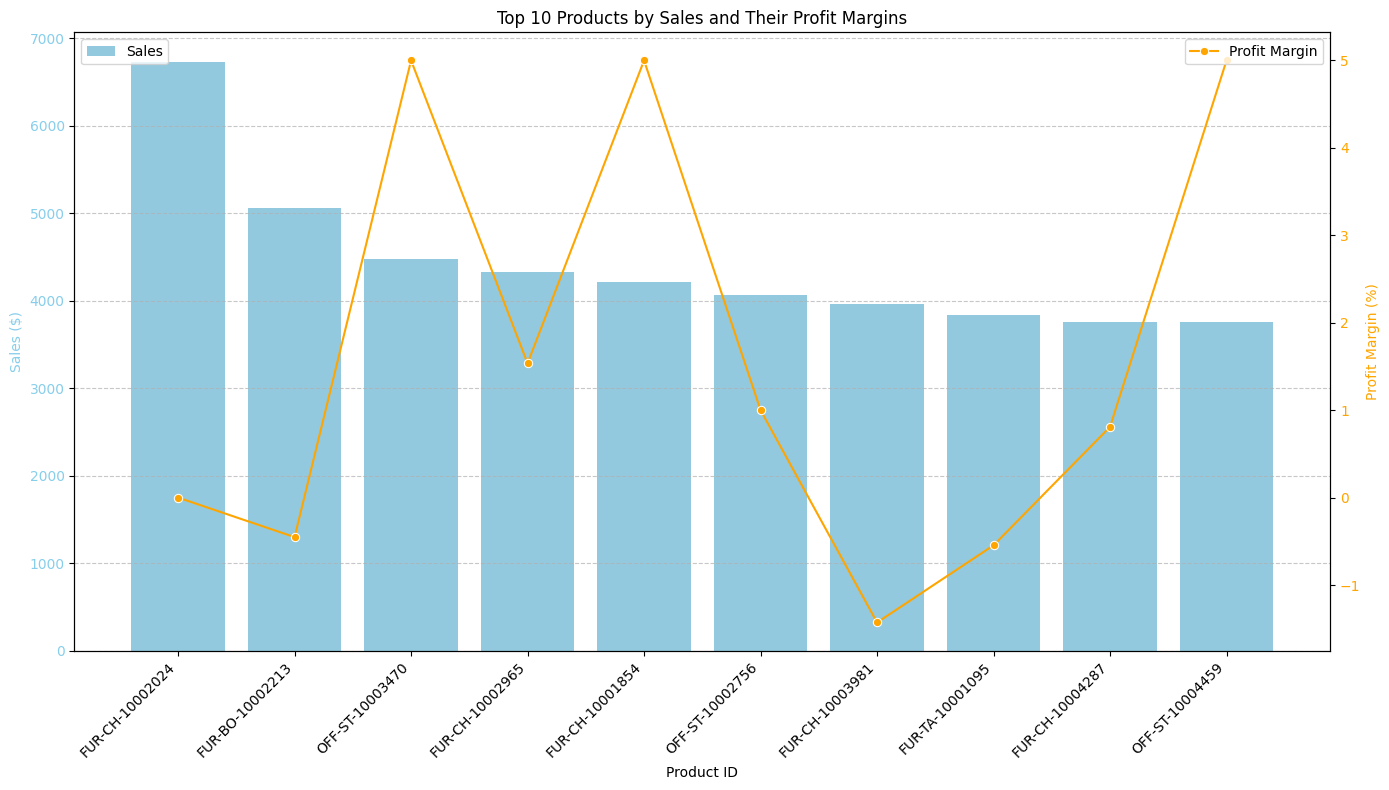

In [ ]:
#9-What are the top products in terms of both sales and profit margins?&  how do they contribute to overall profitability?
# Group by 'Product ID' and calculate total sales and total profit
product_performance = dataset_no_outliers.groupby('Product ID')[['Sales', 'Profit']].sum().reset_index()

# Calculate profit margin for each product
product_performance['Profit Margin (%)'] = (product_performance['Profit'] / product_performance['Sales']) * 100

# Sort the products by sales and get the top 10
top_products = product_performance.sort_values(by='Sales', ascending=False).head(10)

# Visualization using a bar chart for both Sales and Profit Margin
plt.figure(figsize=(14, 8))

# Create a twin axis to plot sales and profit margin
ax1 = plt.subplot(111)
sns.barplot(x='Product ID', y='Sales', data=top_products, ax=ax1, color='skyblue', label='Sales')
ax1.set_ylabel('Sales ($)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_products['Product ID'], rotation=45, ha='right')

# Create a second y-axis for profit margin
ax2 = ax1.twinx()
sns.lineplot(x='Product ID', y='Profit Margin (%)', data=top_products, ax=ax2, color='orange', marker='o', label='Profit Margin')
ax2.set_ylabel('Profit Margin (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and grid
plt.title('Top 10 Products by Sales and Their Profit Margins')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

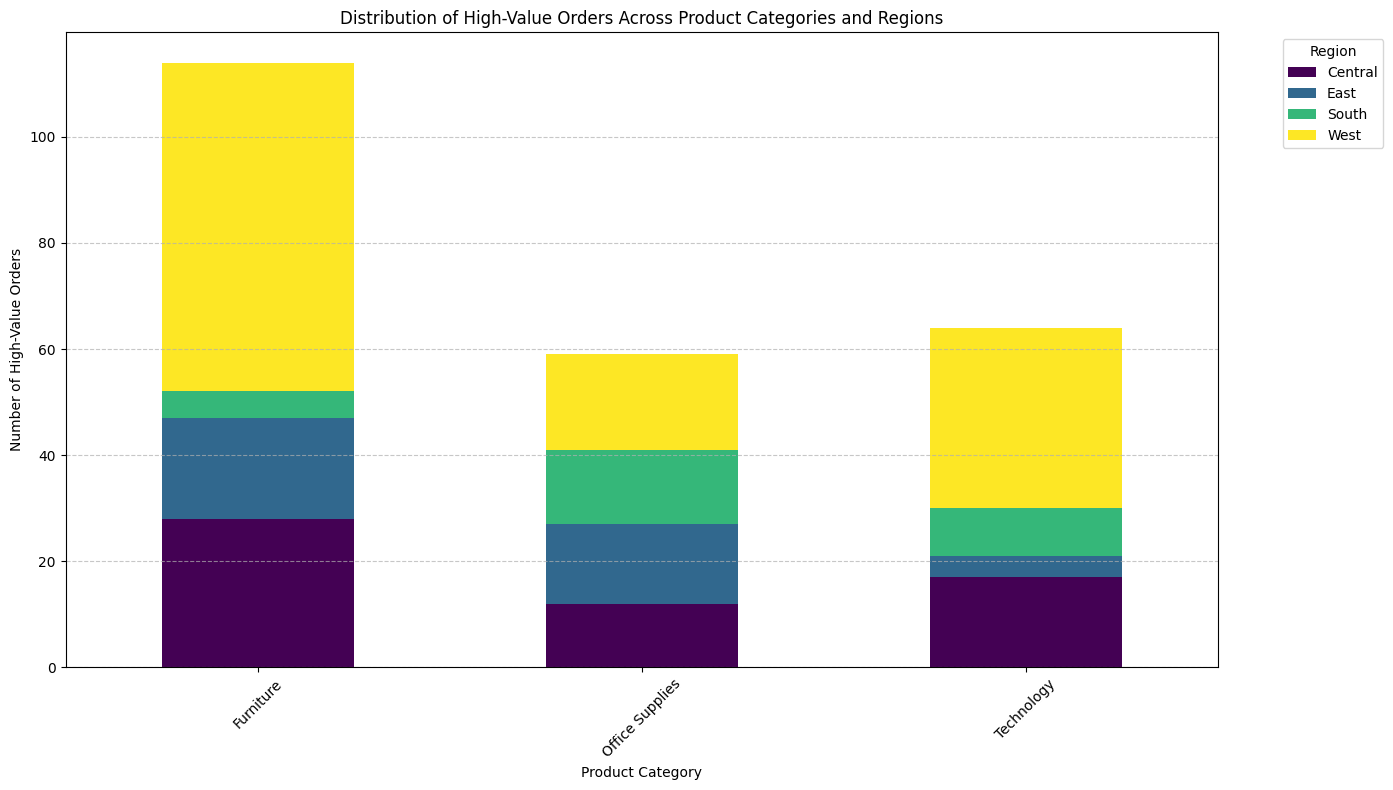

In [ ]:
#10-What is the distribution of high-value orders (> a certain threshold) across product categories and regions?
# Define the high-value order threshold
high_value_threshold = 500  # You can change this value as needed

# Filter the dataset for high-value orders
high_value_orders = dataset_no_outliers[dataset_no_outliers['Sales'] > high_value_threshold]

# Group by 'Category' and 'Region' to count high-value orders
high_value_distribution = high_value_orders.groupby(['Category', 'Region']).size().unstack(fill_value=0)

# Visualization using a stacked bar chart
plt.figure(figsize=(14, 8))
high_value_distribution.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title('Distribution of High-Value Orders Across Product Categories and Regions')
plt.xlabel('Product Category')
plt.ylabel('Number of High-Value Orders')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Prepare the Data
# Convert 'Order Date' to datetime
dataset_no_outliers.loc['Order Date'] = pd.to_datetime(dataset_no_outliers.loc['Order Date'], errors='coerce')

# Extract the month from 'Order Date'
dataset_no_outliers.loc['Month'] = dataset_no_outliers['Order Date'].dt.to_period('M')

# Group the data by 'Month' and calculate total sales
monthly_sales = dataset_no_outliers.groupby('Month')['Sales'].sum().reset_index()

# Convert the 'Month' to a numerical time index
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # Convert to string format
monthly_sales['Time_Index'] = np.arange(len(monthly_sales))  # Add a time index for linear regression

<ipython-input-24-0495ddebaae2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_outliers.loc['Month'] = dataset_no_outliers['Order Date'].dt.to_period('M')


In [ ]:
# Step 2: Train the Linear Regression Model
X = monthly_sales[['Time_Index']]  # Time index as input feature
y = monthly_sales['Sales']  # Sales as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 3: Make Predictions
# Predict sales for the test set
y_pred = model.predict(X_test)

# Forecast future sales by extending the time index
future_months = 12  # Forecast for the next 12 months
future_index = np.arange(len(monthly_sales), len(monthly_sales) + future_months).reshape(-1, 1)

# Predict future sales
future_sales = model.predict(future_index)
# Convert future_index into a DataFrame with the same column name used during training
future_index_df = pd.DataFrame(future_index, columns=['Time_Index'])

# Now use this DataFrame for prediction
future_sales = model.predict(future_index_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


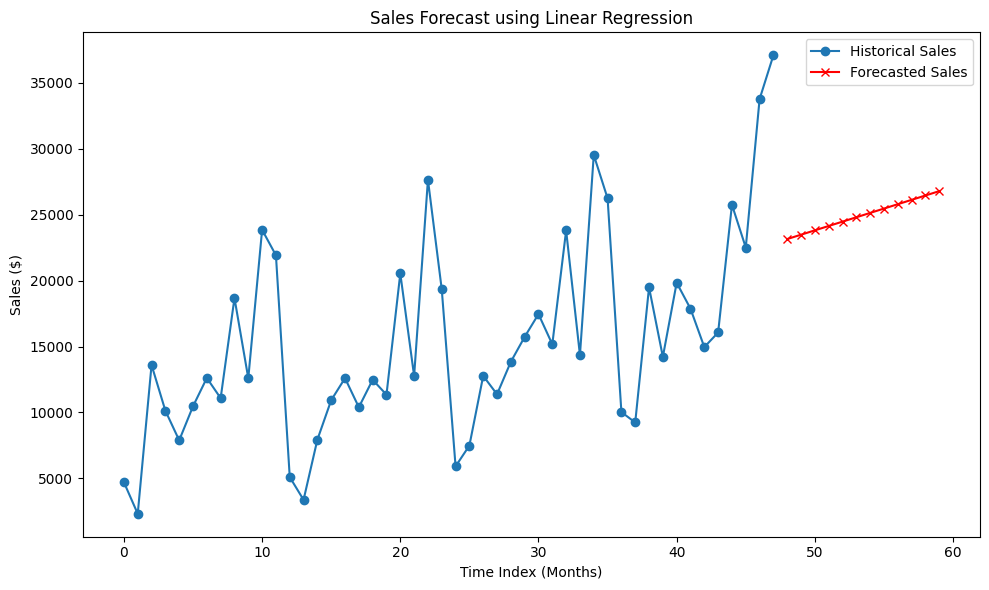

In [ ]:
# Step 4: Visualize the Results
# Plot historical sales and forecasted sales
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Time_Index'], monthly_sales['Sales'], label='Historical Sales', marker='o')
plt.plot(future_index, future_sales, label='Forecasted Sales', marker='x', color='red')
plt.xlabel('Time Index (Months)')
plt.ylabel('Sales ($)')
plt.title('Sales Forecast using Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Save the new dataset after the forecasting
dataset.to_excel('/content/Drive/MyDrive/DEPI Final Project Material/Final_Dataset.xlsx', index=False)